# Домашнее задание №6. 
## Кластеризация.

### О задании

Часть 1 содержит практическое задание на реализацию метода KMeans.

Часть 2 содержит практическое задание на применение методов KMeans и DBSCAN.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 100 / 8,
$$

где points — количество баллов, которое вы набрали. Всего в данном домашнем задании можно набрать 8 баллов. Итого, максимальная оценка за данное домашнее задание - $8 \times 100 / 8 = 100$.

**Disclaimer**: 

В случае использования больших языковых моделей (large language models (LLMs), к примеру: ChatGPT, GigaChat, Qwen, etc):
- В chunk (ячейку) выше кода, созданного LLM, прикрепляйте промпт, который использовался для генерации 
- За решение с указанным промптом - _штраф 40%_ для конкретного задания, который может быть пересмотрен в сторону увеличения в следующих случаях: 
    - использован ответ LLM без указания промпта _(штраф 100%)_
    - решение избыточно и, или написано неоптимально (использование magic команд без необходимости, использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, etc) _(штраф 50%)_

Также: 
- Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.
- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

# Часть 1. K-means своими руками (4 балла)

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (8, 5)

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [3]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

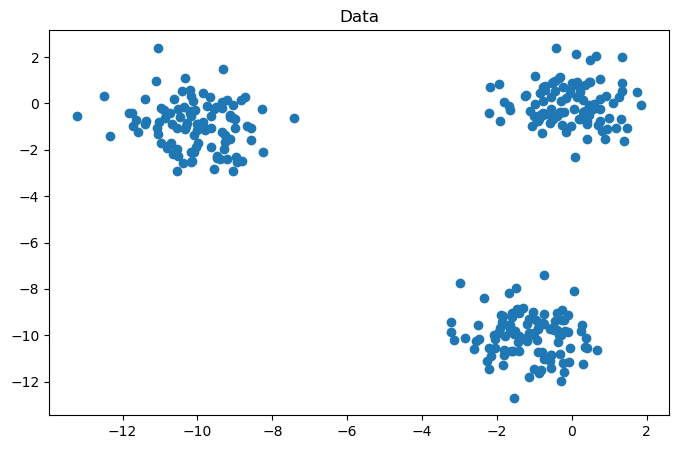

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.show()

## Задание 1 (1 балл)

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

In [5]:
from sklearn.metrics import pairwise_distances

In [6]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    # Вычисляем матрицу расстояний между объектами и центрами кластеров
    distances = pairwise_distances(X, centers)
    
    # Находим индекс ближайшего кластера для каждого объекта
    y = np.argmin(distances, axis=1)
    
    return y

centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

In [7]:
centers

array([[0.  , 0.05],
       [0.1 , 0.15],
       [0.2 , 0.25]])

## Задание 2 (3 балла)

Реализуйте класс KMeans, обладающий методами `fit` (находит оптимальные центры кластеров) и `transform` (вычисляет, к какому кластеру относятся каждый объект выборки).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**
5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

In [8]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков?
        num_obj = X.shape[0] # your code here
        num_feat = X.shape[1] # your code here
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = np.random.randint(0, self.n_clusters, size=num_obj) # your code here
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        self.centers = np.zeros((self.n_clusters, num_feat)) # your code here
        
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
                cluster_points = X[y == cl]
                if cluster_points.size > 0:
                    self.centers[cl] = np.sum(cluster_points, axis=0) / (len(cluster_points) + 1e-6)
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            y = np.argmin(pairwise_distances(X, self.centers), axis=1) # your code here
            
            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        
        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        y_pred = np.argmin(pairwise_distances(X, self.centers), axis=1)
        return y_pred

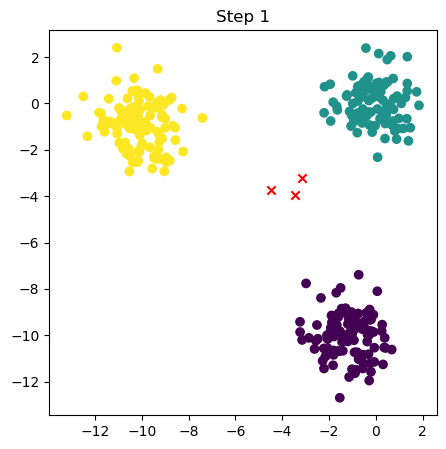

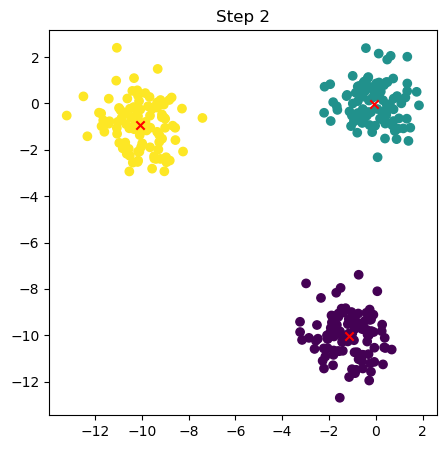

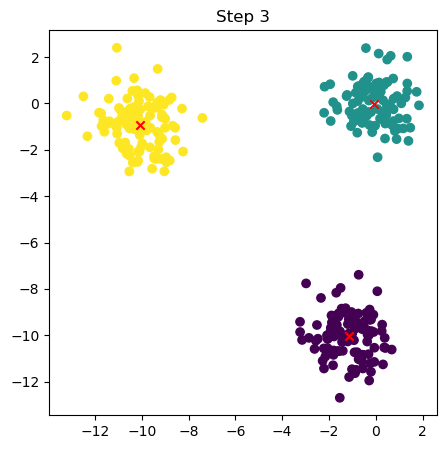

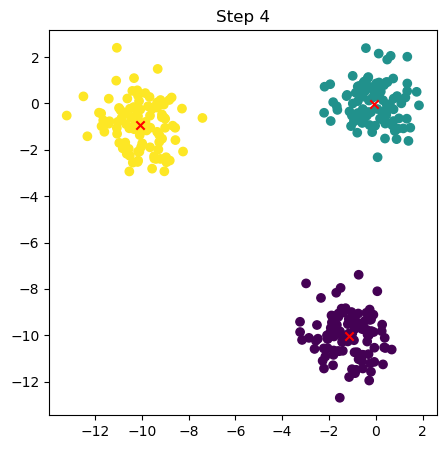

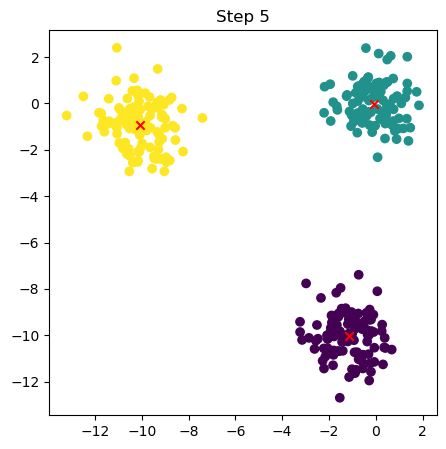

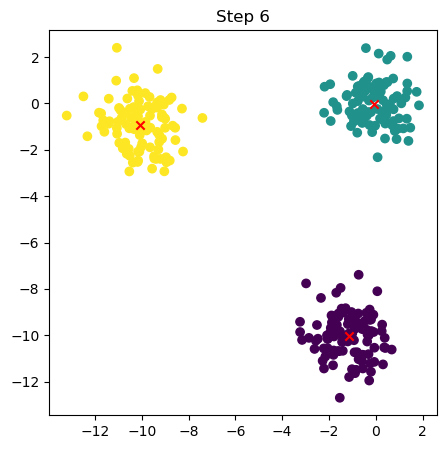

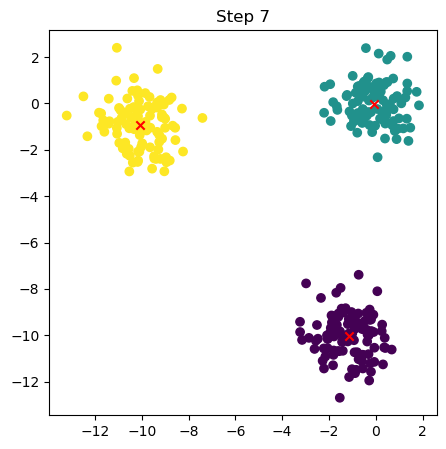

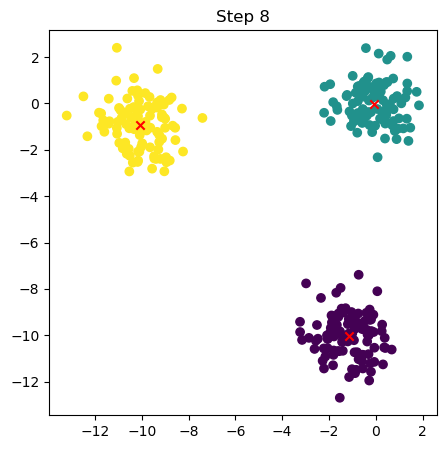

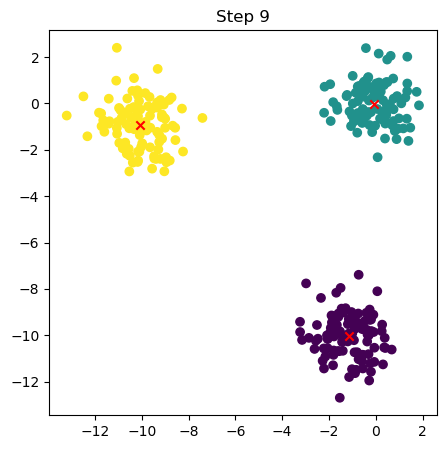

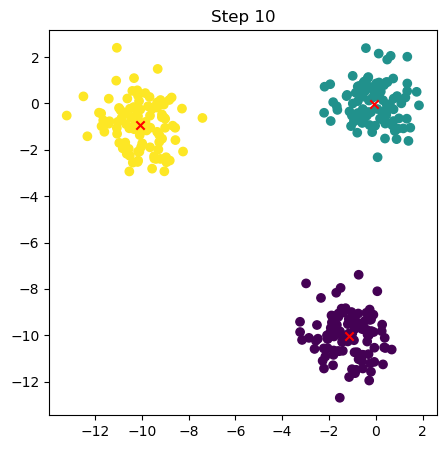

In [9]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

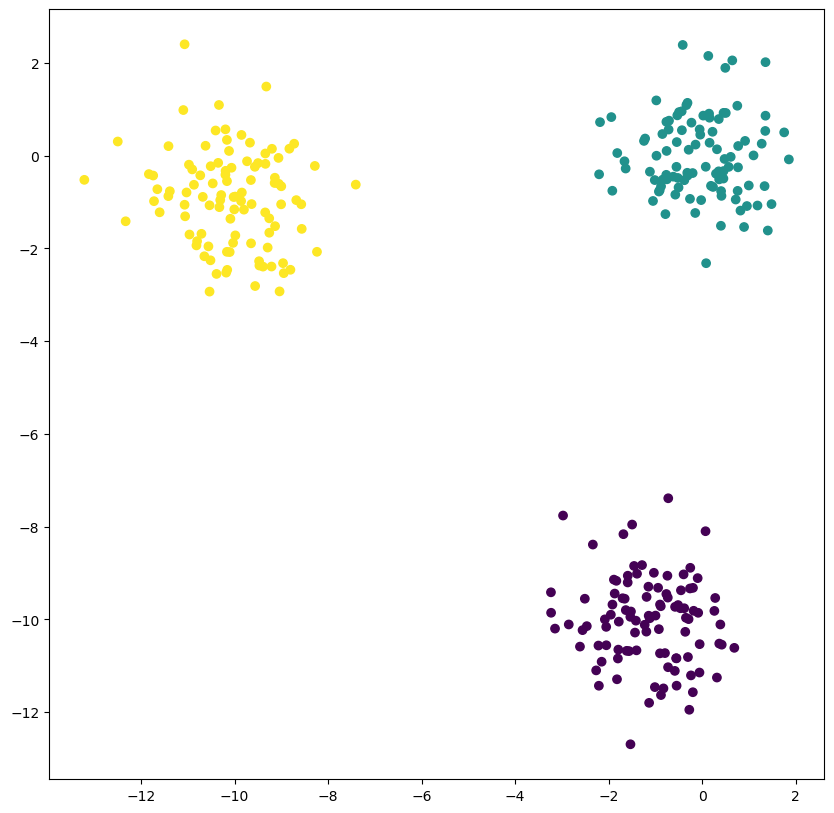

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Часть 2. Кластеризация цифр (4 балла)

В этом задании вам нужно будет кластеризовать изображения цифр. В данном случае одна картинка - это один объект (признаков столько, сколько на картинке пикселей).

In [11]:
from sklearn.datasets import load_digits

In [12]:
digits = load_digits()

In [13]:
digits = digits["data"]

Число объектов и признаков:

In [14]:
digits.shape

(1797, 64)

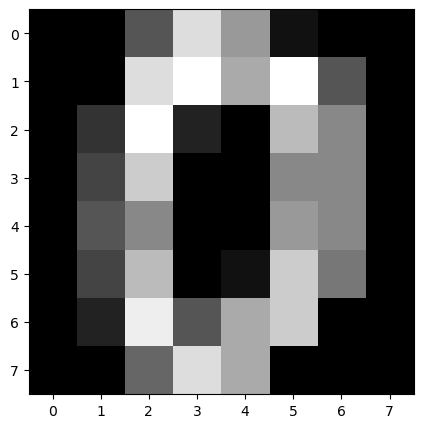

In [15]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(digits[0].reshape(8, 8), cmap="gray")
plt.show()

In [16]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Задание 1 (2 балла)

Кластеризуйте цифры методами кластеризации k-means ([`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) и DBSCAN ([`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)). Измерьте качество кластеризации с помощью метрики Silhouette Coefficient ([`sklearn.metrics.silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

In [20]:
digits = load_digits() # Загружаем данные только один раз
X = digits.data
y = digits.target

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
k_mean_model = KMeans(n_clusters=10, random_state=42)

In [30]:
k_means_digit_labels = k_mean_model.fit_predict(X)

In [31]:
kmeans_silhouette = silhouette_score(X, k_means_digit_labels)
print(f'Silhouette Coefficient для K-Means: {kmeans_silhouette:.4f}')

Silhouette Coefficient для K-Means: 0.1765


In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация DBSCAN
dbscan_model = DBSCAN(eps=5.5, min_samples=10) # eps=3.5, min_samples=10
dbscan_digit_labels = dbscan_model.fit_predict(X_scaled)

In [96]:
if len(set(dbscan_digit_labels)) > 1:  # Проверяем, есть ли хотя бы 2 кластера
    dbscan_silhouette = silhouette_score(X, dbscan_digit_labels)
    print(f'Silhouette Coefficient for DBSCAN: {dbscan_silhouette:.4f}')
else:
    print('DBSCAN не смог найти кластеры.')

Silhouette Coefficient for DBSCAN: 0.0336


Text(0, 0.5, 'Pixel 2')

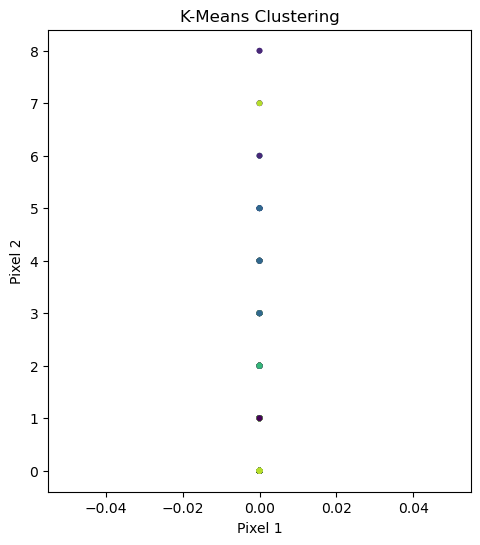

In [34]:
# Визуализация результатов кластеризации K-Means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=k_means_digit_labels, cmap='viridis', s=10)
plt.title('K-Means Clustering')
plt.xlabel('Pixel 1')
plt.ylabel('Pixel 2')

Text(0, 0.5, 'Pixel 2')

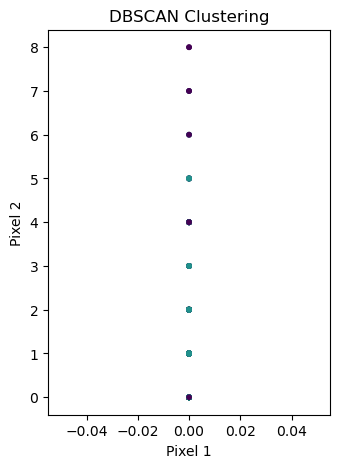

In [97]:
# Визуализация результатов кластеризации DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_digit_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('Pixel 1')
plt.ylabel('Pixel 2')

## Задание 2 (1 балл)

Для кластеризации методом k-means визуализируйте картинки - центры кластеров (метод `.cluster_centers_` у KMeans).

In [42]:
# Получение центров кластеров
centers = k_mean_model.cluster_centers_

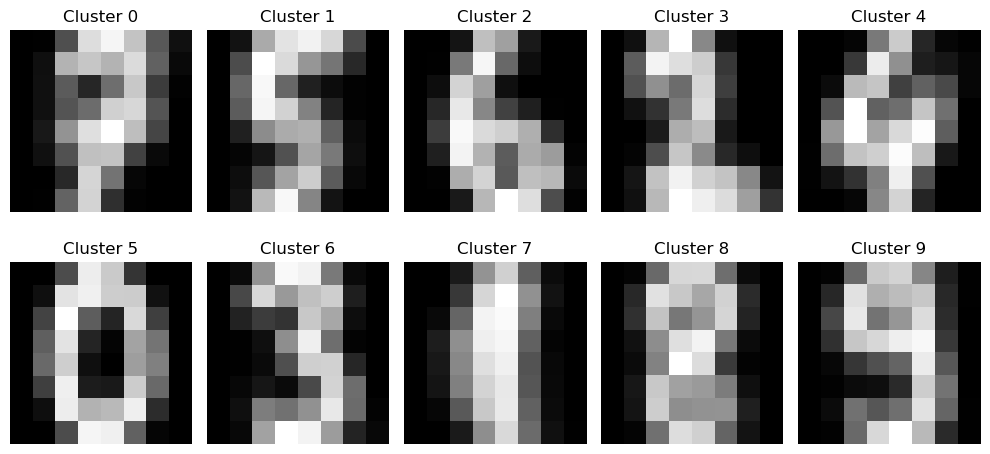

In [43]:
# Визуализация центров кластеров
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i].reshape(8, 8), cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Задание 3 (1 балл)

Для кластеризации методом DBSCAN выведите три случайно выбранные картинки из каждого кластера.

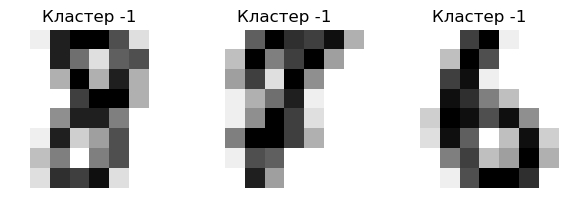

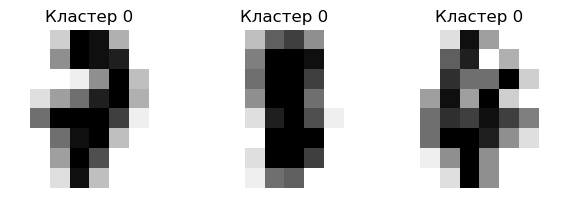

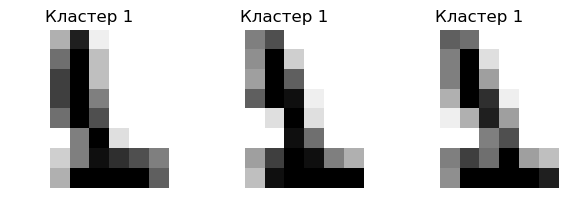

In [99]:
n_clusters = len(set(dbscan_digit_labels)) - (1 if -1 in dbscan_digit_labels else 0) # Учитываем шум как отдельный кластер

for cluster in range(-1, n_clusters): # Итерируемся по кластерам, включая шум (-1)
    cluster_indices = np.where(dbscan_digit_labels == cluster)[0]
    if len(cluster_indices) > 0:
        n_images = min(len(cluster_indices), 3)
        random_indices = np.random.choice(cluster_indices, size=n_images, replace=False)
        
        fig, axes = plt.subplots(1, n_images, figsize=(n_images*2, 2))

        if n_images == 1:
            image = X[random_indices[0]].reshape(8, 8)
            axes.imshow(image, cmap=plt.cm.gray_r)
            axes.set_title(f"Кластер {cluster}")
            axes.axis('off')

        else:
            for i, idx in enumerate(random_indices):
                image = X[idx].reshape(8, 8)
                axes[i].imshow(image, cmap=plt.cm.gray_r)
                axes[i].set_title(f"Кластер {cluster}")
                axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()